# Importação das Bibliotecas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
# # Run this cell to mount your Google Drive.

from google.colab import drive
# drive.mount('/content/drive/My Drive/Colab Notebooks/estatisticaDB.xlsx')

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import researchpy as rp
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Run this cell to mount your Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')




In [0]:
from google.colab import drive
# drive.mount('/content/drive/My Drive/Colab Notebooks/estatisticaDB.xlsx')

In [0]:
# Run this cell to mount your Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')

!pip install researchpy

In [0]:
!pip install researchpy

# Importação do conjunto de dados

In [0]:
# db = pdb['Gênero']d.read_excel('/content/drive/My Drive/Colab Notebooks/estatisticaDB.xlsx')

db = pd.read_excel('/content/drive/My Drive/Colab Notebooks/estatisticaDB.xlsx')
db.head()


,Voluntário,Gênero,Etnia,idade1,idade2,idade3,idade4,massa1,massa2,massa3,massa4,estat1,estat2,estat3,estat4,p_cerv1,p_cerv2,p_cerv3,p_cerv4,p_braco1,p_braco2,p_braco3,p_braco4,p_punho1,p_punho2,p_punho3,p_punho4,p_c_alta1,p_c_alta2,p_c_alta3,p_c_alta4,p_c_abd1,p_c_abd2,p_c_abd3,p_c_abd4,p_quad1,p_quad2,p_quad3,p_quad4,d_bicip1,d_bicip2,d_bicip3,d_bicip4,d_tricip1,d_tricip2,d_tricip3,d_tricip4,d_subes1,d_subesc2,d_subesc3,d_subesc4,d_suprail1,d_suprail2,d_suprail3,d_suprail4
0,1,Feminino,Parda,19,19,20,20,68.1,63.3,68.7,71.0,173.0,173.0,173.0,176.0,31.060000,33.0,34.500000,34.0,25.200000,27.5,28.000000,29.5,15.966667,16.5,15.9,15.5,77.28,83.0,83.000000,85.5,89.48,96.8,89.50,93.0,98.37,97.0,99.500000,101.0,7.0,6.76,8.600000,9.200,20.00,14.50,24.330000,15.10,20.0,15.00,22.800000,18.700,18.0,10.50,29.000000,26.9
1,2,Feminino,Branca,24,24,25,25,65.1,64.3,63.9,63.9,160.0,160.0,160.0,159.0,30.933333,31.3,30.500000,31.0,29.133333,30.4,27.000000,30.0,14.833333,15.1,15.0,14.4,72.23,72.3,71.000000,73.4,81.43,80.3,80.00,84.0,102.07,103.2,100.000000,103.0,9.4,11.83,6.930000,12.500,26.42,29.33,18.330000,31.60,18.2,17.53,15.830000,21.400,25.8,21.86,28.200000,27.6
2,3,Feminino,Branca,21,21,22,22,58.7,57.5,55.9,56.7,167.0,167.0,167.0,168.0,32.500000,33.0,32.000000,32.5,22.000000,22.0,22.000000,22.0,14.100000,14.2,14.0,14.1,66.50,67.0,66.000000,66.5,71.00,72.0,70.00,71.0,91.00,89.0,93.000000,91.0,6.6,5.66,5.670000,5.665,13.60,12.93,14.330000,13.63,10.0,11.26,10.670000,10.965,13.0,15.83,13.170000,14.5
3,4,Feminino,Branca,19,19,20,20,72.6,70.7,71.6,71.5,162.0,164.0,163.0,163.0,36.140000,35.0,36.013333,36.9,31.600000,29.0,31.966667,35.3,16.000000,15.4,16.0,16.6,86.94,84.0,86.346667,88.1,86.94,90.0,90.18,93.6,81.86,99.0,95.153333,104.6,15.0,18.00,16.233333,12.700,25.00,31.50,29.066667,30.70,25.0,33.50,31.443333,35.830,25.0,33.50,31.333333,35.5
4,5,Masculino,Branca,20,20,21,21,80.0,78.3,77.5,81.2,177.5,177.5,177.0,177.0,38.670000,37.5,38.500000,40.0,31.400000,28.0,32.200000,34.0,16.966667,16.0,17.4,17.5,84.13,82.0,84.400000,86.0,91.07,85.0,96.70,91.5,100.00,96.0,103.000000,102.0,4.0,3.00,3.530000,5.400,12.60,17.16,16.530000,10.20,19.0,24.18,24.430000,19.000,12.0,12.50,34.570000,30.5


# 1.1 Estatística Descritiva

## a) Frequências

In [0]:
# Funções que irão mostrar um gráfico de pizza para as variáveis genero e etnia

# def show_sexo_frequency(db_genero):
    
#     masculino = db_genero.value_counts()[0]
#     feminino = db_genero.value_counts()[1]
    
#     labels = 'Maculino', 'Feminino'
#     sizes = [masculino, feminino]
#     colors = ['blue', 'pink']
#     explode = (0, 0,)
#     plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#     autopct='%1.1f%%', shadow=True, startangle=140)
    
#     plt.xlabel('Gênero')
#     plt.axis('equal')
#     plt.show()
    
# def show_etnia_frequency(db_etnia):
    
#     branca = db_etnia.value_counts()[0]
#     mulata = db_etnia.value_counts()[1]
#     parda = db_etnia.value_counts()[2]
#     negra = db_etnia.value_counts()[3]
    
#     labels = 'Branca', 'Parda','Mulata','Negra'
#     sizes = [branca, mulata, parda, negra]
#     colors = ['lightskyblue', 'pink','gold', 'lightcoral']
#     explode = (0, 0, 0, 0)
#     plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#     autopct='%1.1f%%', shadow=True, startangle=140)
    
#     plt.xlabel('Etnia')
#     plt.axis('equal')
#     plt.show()

# Função que recebe um lista de valores e formata para mostrar a pct e o valor
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Funções que irão mostrar um gráfico de pizza para as variáveis Gênero e Etnia
def show_sexo_frequency(db_genero):
    
    masculino = db_genero.value_counts()[0]
    feminino = db_genero.value_counts()[1]
    
    # Variáveis para o matplotlib
    labels = 'Maculino', 'Feminino'
    values = [masculino, feminino]
    colors = ['blue', 'pink']
    explode = (0, 0,)
    plt.pie(values, explode=explode, labels=labels, colors=colors,
    autopct=make_autopct(values), shadow=True, startangle=140)
    
    plt.xlabel('Gênero')
    plt.axis('equal')
    plt.show()
    
def show_etnia_frequency(db_etnia):
    
    branca = db_etnia.value_counts()[0]
    mulata = db_etnia.value_counts()[1]
    parda = db_etnia.value_counts()[2]
    negra = db_etnia.value_counts()[3]
    
    # Variáveis para o matplotlib
    labels = 'Branca', 'Parda','Mulata','Negra'
    values = [branca, mulata, parda, negra]
    colors = ['lightskyblue', 'pink','gold', 'lightcoral']
    explode = (0, 0, 0, 0)
    plt.pie(values, explode=explode, labels=labels, colors=colors,
    autopct=make_autopct(values), shadow=True, startangle=140)
    
    plt.xlabel('Etnia')
    plt.axis('equal')
    plt.show()

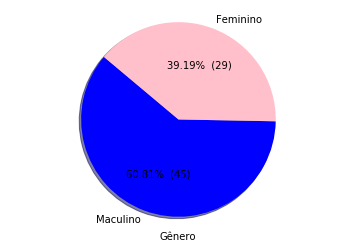

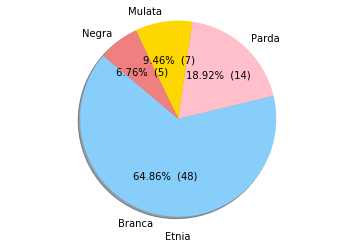

In [0]:
show_sexo_frequency(db['Gênero'])
print()
show_etnia_frequency(db['Etnia'])

## b) Medidas de tendências central, separatrizes e dispersão

In [0]:
# Funções estatísticas pessoais, ou esja, se o uso de bibliotecas

def media(x):
    return sum(x) / len(x)

def desvio_padrao(x, amostral=False):
    _media = media(x)
    tam = len(x)
    if amostral:
        tam = tam - 1
    soma = 0
    for i in x:
        soma = soma + (i - _media) ** 2
    return (soma / (tam))**0.5

In [0]:
# Cria um dataframe para cada atributo contendo a média das quatro medidas e seus desvios padrão
# além de suas medidas (m1, m2, m3 e m4)

idade = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [ media([i, j, k, l])  for i, j, k, l in zip(db['idade1'], db['idade2'], db['idade3'], db['idade4']) ],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['idade1'], db['idade2'], db['idade3'], db['idade4'])],
'm1': db['idade1'],
'm2': db['idade2'],
'm3': db['idade3'],
'm4': db['idade4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
idade.name = 'Idade'

massa = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['massa1'], db['massa2'], db['massa3'], db['massa4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['massa1'], db['massa2'], db['massa3'], db['massa4'])],
'm1': db['massa1'],
'm2': db['massa2'],
'm3': db['massa3'],
'm4': db['massa4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
massa.name = 'Massa'
estatura = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['estat1'], db['estat2'], db['estat3'], db['estat4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['estat1'], db['estat2'], db['estat3'], db['estat4'])],
'm1': db['estat1'],
'm2': db['estat2'],
'm3': db['estat3'],
'm4': db['estat4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
estatura.name = 'Estatura'

perimetria_cervical = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['p_cerv1'], db['p_cerv2'], db['p_cerv3'], db['p_cerv4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['p_cerv1'], db['p_cerv2'], db['p_cerv3'], db['p_cerv4'])],
'm1': db['p_cerv1'],
'm2': db['p_cerv2'],
'm3': db['p_cerv3'],
'm4': db['p_cerv4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
perimetria_cervical.name = 'Perimetria Cervical'

perimetria_braco = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['p_braco1'], db['p_braco2'], db['p_braco3'], db['p_braco4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['p_braco1'], db['p_braco2'], db['p_braco3'], db['p_braco4'])],
'm1': db['p_braco1'],
'm2': db['p_braco2'],
'm3': db['p_braco3'],
'm4': db['p_braco4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
perimetria_braco.name = 'Perimetria Braço'

perimetria_punho = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['p_punho1'], db['p_punho2'], db['p_punho3'], db['p_punho4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['p_punho1'], db['p_punho2'], db['p_punho3'], db['p_punho4'])],
'm1': db['p_punho1'],
'm2': db['p_punho2'],
'm3': db['p_punho3'],
'm4': db['p_punho4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
perimetria_punho.name = 'Perimetria Punho'

perimetria_cintura_alta = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['p_c_alta1'], db['p_c_alta2'], db['p_c_alta3'], db['p_c_alta4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['p_c_alta1'], db['p_c_alta2'], db['p_c_alta3'], db['p_c_alta4'])],
'm1': db['p_c_alta1'],
'm2': db['p_c_alta2'],
'm3': db['p_c_alta3'],
'm4': db['p_c_alta4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
perimetria_cintura_alta.name = 'Perimetria Cintura Alta'

perimetria_abdominal = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['p_c_abd1'], db['p_c_abd2'], db['p_c_abd3'], db['p_c_abd4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['p_c_abd1'], db['p_c_abd2'], db['p_c_abd3'], db['p_c_abd4'])],
'm1': db['p_c_abd1'],
'm2': db['p_c_abd2'],
'm3': db['p_c_abd3'],
'm4': db['p_c_abd4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
perimetria_abdominal.name = 'Perimetria Abdominal'

perimetria_quadril = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['p_quad1'], db['p_quad2'], db['p_quad3'], db['p_quad4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['p_quad1'], db['p_quad2'], db['p_quad3'], db['p_quad4'])],
'm1': db['p_quad1'],
'm2': db['p_quad2'],
'm3': db['p_quad3'],
'm4': db['p_quad4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
perimetria_quadril.name = 'Perimetria Quadril'

dobra_cutanea_bicipital = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['d_bicip1'], db['d_bicip2'], db['d_bicip3'], db['d_bicip4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['d_bicip1'], db['d_bicip2'], db['d_bicip3'], db['d_bicip4'])],
'm1': db['d_bicip1'],
'm2': db['d_bicip2'],
'm3': db['d_bicip3'],
'm4': db['d_bicip4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
dobra_cutanea_bicipital.name = 'Dobra Cutânea Bicipital'

dobra_cutanea_tricipital = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['d_tricip1'], db['d_tricip2'], db['d_tricip3'], db['d_tricip4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['d_tricip1'], db['d_tricip2'], db['d_tricip3'], db['d_tricip4'])],
'm1': db['d_tricip1'],
'm2': db['d_tricip2'],
'm3': db['d_tricip3'],
'm4': db['d_tricip4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
dobra_cutanea_tricipital.name = 'Dobra Cutânea Tricipital'

dobra_cutanea_subescapular1 = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['d_subes1'], db['d_subesc2'], db['d_subesc3'], db['d_subesc4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['d_subes1'], db['d_subesc2'], db['d_subesc3'], db['d_subesc4'])],
'm1': db['d_subes1'],
'm2': db['d_subesc2'],
'm3': db['d_subesc3'],
'm4': db['d_subesc4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
dobra_cutanea_subescapular1.name = 'Dobra Cutânea Subescapular 1'

dobra_cutanea_subescapular2 = pd.DataFrame({
    'Voluntário': db['Voluntário'],
 'media': [media([i, j, k, l])  for i, j, k, l in zip(db['d_suprail1'], db['d_suprail2'], db['d_suprail3'], db['d_suprail4'])],
'desvio_padrao': [desvio_padrao([i, j, k, l])  for i, j, k, l in zip(db['d_suprail1'], db['d_suprail2'], db['d_suprail3'], db['d_suprail4'])],
'm1': db['d_suprail1'],
'm2': db['d_suprail2'],
'm3': db['d_suprail3'],
'm4': db['d_suprail4'],
'etnia' : db['Etnia'],
 'genero': db['Gênero']
})
dobra_cutanea_subescapular2.name = 'Dobra Cutânea Subescapular 2'

# Cria uma lista com todos os atributos
lista_todos_atributos = [idade, massa, estatura, perimetria_cervical, perimetria_braco, perimetria_punho, perimetria_cintura_alta, perimetria_abdominal, perimetria_quadril, dobra_cutanea_bicipital, dobra_cutanea_tricipital, dobra_cutanea_subescapular1, dobra_cutanea_subescapular2]

In [0]:
# idade
# massa.head()
# etnia.head()
# print(massa)


In [0]:
def show_error_bar(db, nome_atrib):
    fig, ax = plt.subplots()
    ax.errorbar(db.index + 1, db['media'], db['desvio_padrao'], fmt='o')
    plt.ylabel(nome_atrib + ' média ± desvio padrão ')
    plt.xlabel('Voluntários')
    plt.figure(figsize=(1, 1))
    plt.show()

In [0]:
show_error_bar(idade, idade.name)
show_error_bar(dobra_cutanea_subescapular1, dobra_cutanea_subescapular1.name)

# Teste de ANOVA

In [0]:
# Funçṍes que recebem uma lista e testam se as mesmas possuem distribuição normal

def shapiro_wilki(lista):
    sw =  stats.shapiro(lista)

    print("\nShapiro Wilk: \nP-valor = {}".format(sw[1]))
    if(sw[1] < 0.05):
        print("-> Não tem Distribuição normal")
        return False
    else:
        print("-> Tem Distribuição normal")
        return True

def kolmogorov_smimov(lista):
    loc, scale = stats.norm.fit(lista)
    n = stats.norm(loc=loc, scale=scale)
    ks = stats.kstest(lista, n.cdf)


    print("\nKOLMOGOROV-SMIRNOV:\nP-valor = {}".format(ks[1]))
    if(ks[1] < 0.05):
        print("-> Não tem Distribuição normal")
        return False
    else:
        print("-> Tem Distribuição normal")
        return True


# #h0-> se houver
# #h1-> se não houver
# # db['idade1'], db['idade2'], db['idade3'], db['idade4']
# def anova(db):
# #     f_val, p_val = stats.f_oneway(db.m1,db.m2, db.m3, db.m4)
#     f_val, p_val = stats.f_oneway(db.m1,db.m2, db.m3, db.m4)

#     if(p_val > 0.05):
#         print("Não Tem diferença")

#     else:
#         print("Tem diferença")
#         mc = MultiComparison(db.m1,db.m2)
#         result = mc.tukeyhsd()
#         print(result)
# #         mc = pairwise_tukeyhsd(bd)
# #         res2 = pairwise_tukeyhsd(db.m1,db.m2, db.m3, db.m4)
# #         print (res2)

# #         mod = MultiComparison(db.m1,db.m2)
# #         print( mod.tukeyhsd())
        
#         print(mc.groupsunique)
        
#     print ("One-way ANOVA P =",p_val)
    
# #################################################################
   
# def diff_medidas_ANOVA(lista):
#     atrib_tem_diff = []
#     atrib_n_tem_diff = []
#     for atributo in lista:
#         f_val, p_val = stats.f_oneway(atributo['m1'], atributo['m2'], atributo['m3'], atributo['m4'])
#         if(p_val > 0.05):
#             atrib_n_tem_diff.append(atributo)
#             print("Atributo %s não tem diferença estatística" %atributo.name)
#         else:
#             atrib_tem_diff.append(atributo)
#             print("Atributo %s tem diferença estatística" %atributo.name)
#     return atrib_tem_diff, atrib_n_tem_diff


In [0]:
# Função que recebe uma lista com os atributos e retorna outra lista com atributos que 
# passaram no teste de homogeneidade
def teste_bartlett(lista_atrib):
    atribs_homogeneos = []
    for atrib in lista_atrib:
        p_valor = stats.bartlett(atrib['m1'], atrib['m2'], atrib['m3'], atrib['m4'])[1]
        if p_valor > 0.05:
            atribs_homogeneos.append(atrib)
    return atribs_homogeneos

# lista com os atributos que passaram no teste de bartlett
atribs_homogeneos = teste_bartlett(lista_todos_atributos)

In [0]:
# Função que recebe uma lista de atributos e testa se tem distribuição normal 
# utilizando os critérios de wilki ou smimov, e mostra duas listas: uma contendo
# atributos que possuem distribuição normal e outra contendo o inverso
def teste_dist(lista):
    dist_normal = []
    not_dist_normal = []
    for db in lista:
        print('Para o atributo ->', db.name)
        sw = shapiro_wilki(db['media'])
        ks = kolmogorov_smimov(db['media'])
        if sw or ks:
            dist_normal.append(db.name)
        else:
            not_dist_normal.append(db.name)
        print('--------------------------------------')
    print()
    print('Atributos que possuem Distribuição Normal:')
    print(dist_normal)
    print('Atributos que não possuem Distribuição Normal:')
    print(not_dist_normal)

In [0]:
teste_dist(atribs_homogeneos)

In [0]:
# h0-> se houver
# h1-> se não houver

# Função que recebe uma lista de atributos e retorna duas listas:
# Uma contendo atributos com diferença estatística
# E outra contendo atributos sem diferença estatística
def diff_medidas_ANOVA(lista):
    atrib_com_diff = []
    atrib_sem_diff = []
    for atributo in lista:
        f_val, p_val = stats.f_oneway(atributo['m1'], atributo['m2'], atributo['m3'], atributo['m4'])
        if(p_val > 0.05):
            atrib_sem_diff.append(atributo)
            print("Atributo %s não tem diferença estatística" %atributo.name)
        else:
            atrib_com_diff.append(atributo)
            print("Atributo %s tem diferença estatística" %atributo.name)
    return atrib_com_diff, atrib_sem_diff

#Teste de ANOVA  (ETNIA )

In [251]:
base = [perimetria_quadril,perimetria_cintura_alta,estatura,massa]

# base1 = teste_bartlett(base)
base1 = teste_bartlett(lista_todos_atributos[1:])
parda = []
branca = []
negra = []
mulata = []
for i in base1:
    print("======================",i.name,"======================")
    print()
#     print(i)
    for j in range(len(i)):
#         print(i.etnia[j])
        if(i.etnia[j]== 'Parda'):
            parda.append(i.media[j])
        elif(i.etnia[j]== 'Branca'):
            branca.append(i.media[j])
        elif(i.etnia[j]== 'Mulata'):
            mulata.append(i.media[j])
        elif(i.etnia[j]== 'Negra'):
            negra.append(i.media[j])
            
    f_val, p_val = stats.f_oneway(parda,branca,negra,mulata)
    if(p_val < 0.05):
        print("\n\n\n<<<<<<<<<<<<<<<<<  Tem diferença estatística  >>>>>>>>>>>>>>>>>>\n\n\n" )
        print("P-valor < 0.05 :",p_val)
              
        print("\n\n\n===========================  Regressão ===========================\n\n\n" )
        results = ols('media ~ C(etnia)', data=i).fit()
        print(results.summary())
        
        print("\n\n\n===========================  Tukey  ===========================\n\n\n" )
        mc = MultiComparison(i.media,i.etnia)
        mc_results = mc.tukeyhsd()
        print(mc_results)
        
        
    else:
        print("\n\n\n<<<<<<<<<<<<<<<<<< Não tem diferença estatística >>>>>>>>>>>>>>>>>>\n\n\n" )
        print("P-valor > 0.05 :",p_val)
    
    

    parda = []
    branca = []
    negra = []
    mulata = []
    print("\n\n\n")

    

        


====================== Massa ======================




<<<<<<<<<<<<<<<<<  Tem diferença estatística  >>>>>>>>>>>>>>>>>>



P-valor < 0.05 : 0.03102899792886221



===========================  Regressão ===========================



                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3.130
Date:                Wed, 10 Jul 2019   Prob (F-statistic):             0.0310
Time:                        19:48:25   Log-Likelihood:                -282.70
No. Observations:                  74   AIC:                             573.4
Df Residuals:                      70   BIC:                             582.6
Df Model:                           3                                         
Covariance Type:            nonrobust                  

###Teste de ANOVA - f_oneway

In [193]:

parda = []
branca = []
negra = []
mulata = []
for i in range(len(etnia)):
    if(massa.etnia[i]== 'Parda'):
        parda.append(massa.media[i])
    elif(massa.etnia[i]== 'Branca'):
        branca.append(massa.media[i])
    elif(massa.etnia[i]== 'Mulata'):
        mulata.append(massa.media[i])
    elif(massa.etnia[i]== 'Negra'):
        negra.append(massa.media[i])

f_val, p_val = stats.f_oneway(parda,branca,negra,mulata)
if(p_val < 0.05):
    print("Tem diferença estatística" )
else:
    print("Não tem diferença estatística" )
print("P-valor < 0.05 :",p_val)


# print("Bancos-{} :{}\nNegros-{}:{}\nPardo-{}:{}\nMulata-{}:{}".format(len(branca),branca,len(negra),negra,len(parda),parda,len(mulata),mulata))

Tem diferença estatística
P-valor < 0.05 : 0.03102899792886221


###Teste de ANOVA - statsmodels

In [199]:
# new_db = pd.DataFrame({
#     'massa_media': [media(i)]
#     'Etnia': db['Etnia']
# })
results = ols('media ~ C(etnia)', data=massa).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  media   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3.130
Date:                Wed, 10 Jul 2019   Prob (F-statistic):             0.0310
Time:                        19:01:10   Log-Likelihood:                -282.70
No. Observations:                  74   AIC:                             573.4
Df Residuals:                      70   BIC:                             582.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.1782      1.638     41.009      0.000      63.911      70.445
C(etnia)[T.Mulata]    -1.4336      3.447     -0.416      0.679      -8.309       5.442
C(etnia)[T.Negra]     15.0351      5.333      2.819      0.006       4.398      25.672
C(etnia)[T.Parda]      4.7093      4.592      1.026      0.309      -4.449      13.867
==============================================================================
Omnibus:                        0.577   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.717
Skew:                          -0.137   Prob(JB):                        0.699
Kurtosis:                       2.603   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# aov_table = sm.stats.anova_lm(results, typ=2)
# aov_table

###CALCULAR O TAMANHO DO EFEITO DO MODELO

In [0]:
# def anova_table(aov):
#     aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
#     aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
#     aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
#     cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
#     aov = aov[cols]
#     return aov


In [0]:
# anova_table(aov_table)

###Verificações de suposição / diagnóstico de modelo


In [0]:
# results.diagn

##Outras maneiras de verificar suposições


###Suposição: Homogeneidade de Variância


In [190]:
# etnias = []
# for i in range(len(etnia)):
#     if(massa.etnia[i]== 'Parda'):
#         etnias.append(1)
#     elif(massa.etnia[i]== 'Branca'):
#         etnias.append(2)
#     elif(massa.etnia[i]== 'Mulata'):
#         etnias.append(3)
#     else:
#         etnias.append(4)
# a = stats.levene(db['massa1'],etnias)

w, pvalue = stats.levene(db['massa1'],etnias)

w, pvalue
print("P-val: {}".format(pvalue))

P-val: 4.093203234827308e-22


###Suposição: Normalidade


In [191]:
# stats.shapiro(results.resid)
def shapiro_wilki(lista):
    sw =  stats.shapiro(lista)

    print("\nShapiro Wilk: \nP-valor = {}".format(sw[1]))
    if(sw[1] < 0.05):
        print("-> Não tem Distribuição normal")
        return False
    else:
        print("-> Tem Distribuição normal")
        return True

def kolmogorov_smimov(lista):
    loc, scale = stats.norm.fit(lista)
    n = stats.norm(loc=loc, scale=scale)
    ks = stats.kstest(lista, n.cdf)


    print("\nKOLMOGOROV-SMIRNOV:\nP-valor = {}".format(ks[1]))
    if(ks[1] < 0.05):
        print("-> Não tem Distribuição normal")
        return False
    else:
        print("-> Tem Distribuição normal")
        return True
 

(0.9809764623641968, 0.32892507314682007)

##Testes Post-hoc


##COMPARAÇÃO POST-HOC HSD DE TUKEY


In [168]:
# mc = MultiComparison(df['libido'], df['dose'])
# mc_results = mc.tukeyhsd()
# print(mc_results)
# etnias = []
# for i in range(len(etnia)):
#     if(massa.etnia[i]== 'Parda'):
#         etnias.append(1)
#     elif(massa.etnia[i]== 'Branca'):
#         etnias.append(2)
#     elif(massa.etnia[i]== 'Mulata'):
#         etnias.append(3)
#     else:
#         etnias.append(4)

# m_comp = pairwise_tukeyhsd(massa.media,db['Etnia'])
# print(m_comp)

mc = MultiComparison(massa.media,db['Etnia'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Branca Mulata  -1.4336    0.9 -10.5067  7.6396  False
Branca  Negra  15.0351 0.0311    0.998 29.0723   True
Branca  Parda   4.7093  0.711   -7.376 16.7946  False
Mulata  Negra  16.4687  0.034   0.9064  32.031   True
Mulata  Parda   6.1429 0.6313  -7.6846 19.9704  False
 Negra  Parda -10.3258 0.4129 -27.8164  7.1647  False
-----------------------------------------------------


##COMPARAÇÃO POST-HOC DE CORREÇÃO DE BONFERRONI


In [162]:
stats.ttest_ind(db['Etnia'] == 'Branca', db['Etnia'] == 'Mulata')
    

Ttest_indResult(statistic=6.357335040113942, pvalue=2.4745348498224755e-09)

In [163]:
stats.ttest_ind(db['Etnia'] == 'Branca', db['Etnia'] == 'Negra')


Ttest_indResult(statistic=9.204961952386544, pvalue=3.3312862911884454e-16)

In [164]:
stats.ttest_ind(db['Etnia'] == 'Branca', db['Etnia'] == 'Parda')

Ttest_indResult(statistic=8.453959037807643, pvalue=2.6457286242254477e-14)

In [165]:
stats.ttest_ind(db['Etnia'] == 'Mulata', db['Etnia'] == 'Negra')

Ttest_indResult(statistic=2.233802457184055, pvalue=0.02701627466346085)

In [166]:
stats.ttest_ind(db['Etnia'] == 'Mulata', db['Etnia'] == 'Parda')

Ttest_indResult(statistic=1.6530639191681655, pvalue=0.10046659962047635)

In [167]:
stats.ttest_ind(db['Etnia'] == 'Negra', db['Etnia'] == 'Parda')

Ttest_indResult(statistic=-0.5989343525983118, pvalue=0.5501448422487665)

In [129]:

# # # massa = massa.media
# # # etnia = massa.etnia
# # # print(massa)
# parda = []
# branca = []
# negra = []
# mulata = []
# for i in range(len(etnia)):
# #    print(massa.etnia[i])
#     if(massa.etnia[i]== 'Parda'):
#         parda.append(massa.media[i])
#     elif(massa.etnia[i]== 'Branca'):
#         branca.append(massa.media[i])
#     elif(massa.etnia[i]== 'Mulata'):
#         mulata.append(massa.media[i])
#     else:
#         negra.append(massa.media[i])

# # f_val, p_val = stats.f_oneway(db['Etnia'],db['massa1'])
# f_val, p_val = stats.f_oneway(parda,branca,negra,mulata)
# if(p_val > 0.05):
#     print("Não tem diferença estatística" )
# else:
#     print("Tem diferença estatística" )
# print(stats.f_oneway(parda,branca,negra,mulata))
#############################################################
# results = ols('massa1 ~ C(Etnia)', data=db).fit()
# results.summary()
###TEM DIFERENÇA
########################################################
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table
###################################################
# # rp.summary_cont(df['libido'].groupby(df['dose']))
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

# results.diagn

stats.shapiro(results.resid)
idetinias = []
for i in range(len(etnia)):
    if(massa.etnia[i]== 'Parda'):
        idetinias.append(1)
    elif(massa.etnia[i]== 'Branca'):
        idetinias.append(2)
    elif(massa.etnia[i]== 'Mulata'):
        idetinias.append(3)
    else:
        idetinias.append(4)
# print(idetinias)
# mc = MultiComparison([1,2,3,4],db['massa1'])
# mc_results = mc.tukeyhsd()
# print(mc_results)


# massa = massa.media
# etnia = massa.etnia
# print(massa)
#ntinia = []
#for i in range(len(etnia)):
#    print(massa.etnia[i])
#     if(massa.etnia[i]== 'Parda'):
#         parda.append(massa.media[i])
#     elif(massa.etnia[i]== 'Branca'):
#         branca.append(massa.media[i])
#     elif(massa.etnia[i]== 'Mulata'):
#         mulata.append(massa.media[i])
#     else:
#         negra.append(massa.media[i])
#     if(massa.etnia[i]== 'Parda'):
#         intinia.append(1)
#     elif(massa.etnia[i]== 'Branca'):
#         intinia.append(2)
#     elif(massa.etnia[i]== 'Mulata'):
#         intinia.append(3)
#     else:
#         intinia.append(4)
# # intinia
# mc = MultiComparison(massa.etnia, massa.media)
# mc_results = mc.tukeyhsd()
# print(mc_results)
# data = massa.media
# # print(data)
# db.boxplot('massa1', by='group')

Tem diferença estatística
F_onewayResult(statistic=3.1298562335116045, pvalue=0.03102899792886221)


In [0]:
mc1 = MultiComparison(parda,branca,negra)
# mc2 = MultiComparison(atrib_com_diff['m1'], atrib_com_diff['m3'])
# mc3 = MultiComparison(atrib_com_diff['m1'], atrib_com_diff['m4'])
# mc4 = MultiComparison(atrib_com_diff['m2'], atrib_com_diff['m3'])
# mc5 = MultiComparison(atrib_com_diff['m2'], atrib_com_diff['m4'])
# mc6 = MultiComparison(atrib_com_diff['m3'], atrib_com_diff['m4'])
return [mc1.tukeyhsd()]

ValueError: ignored

In [0]:
atrib_com_diff, atrib_sem_diff = diff_medidas_ANOVA(lista_todos_atributos)

In [0]:
# Função que recebe uma lista de atributos com diferença estatística e calcula para cada 
# medida o teste de Tukey
def teste_tukey(atrib_com_diff):
    mc1 = MultiComparison(atrib_com_diff['m1'], atrib_com_diff['m2'])
    mc2 = MultiComparison(atrib_com_diff['m1'], atrib_com_diff['m3'])
    mc3 = MultiComparison(atrib_com_diff['m1'], atrib_com_diff['m4'])
    mc4 = MultiComparison(atrib_com_diff['m2'], atrib_com_diff['m3'])
    mc5 = MultiComparison(atrib_com_diff['m2'], atrib_com_diff['m4'])
    mc6 = MultiComparison(atrib_com_diff['m3'], atrib_com_diff['m4'])
    return [mc1.tukeyhsd(), mc2.tukeyhsd(), mc3.tukeyhsd(), mc4.tukeyhsd(), mc5.tukeyhsd(), mc6.tukeyhsd()]

In [0]:
## Pode-se variar entre os atributos e as medidas do atributo escolhido
## Exemplo: Atributo 1 e medida m1 com m2
teste_result = teste_tukey(atrib_com_diff[0])

print(teste_result[0].summary())
print(teste_result[0].groupsunique)

In [0]:
for atrib in atrib_com_diff:
    show_atrib_error_bar(atrib)

In [0]:
# h0 -> Não existe relação entre a variável Gênero e a variável Etnia.
# h1 -> Existe uma relação entre a variável Gênero e a variável Etnia.
crosstab = pd.crosstab(db['Gênero'], db['Etnia'])
result = stats.chi2_contingency(crosstab)
if result[1] > 0.05:
    print('Não existe relação entre a variável Gênero e a variável Etnia.')
else:
    print('Existe uma relação entre a variável Gênero e a variável Etnia.')
print('P-valor:', result[1])
crosstab

In [0]:
# f_val, p_val = stats.f_oneway(db['Etnia'],massa.media)
# rp.summary_cont(db['Etnia'].groupby(massa.media))
# db['Etnia']
# massa.media
a = [1,2,3,4,5,6]
b = [2,4,6,8,10,12]
stats.f_oneway(db['Etinia'],db['G'])


In [0]:
anova(perimetria_braco)
# diff_medidas_ANOVA(lista_atributos)

#ANOVA (Gênero)

In [247]:
# base = [perimetria_quadril,perimetria_cintura_alta,estatura,massa]

# # base1 = teste_bartlett(base)
# base1 = teste_bartlett(lista_todos_atributos)
# masculino = []
# femenino = []
# for i in base1:
#     print("======================",i.name,"======================")
#     print()
# #     print(i)
#     for j in range(len(i)):
# #         print(i.genero[j])
#         if(i.genero[j]== 'Masculino'):
#             masculino.append(i.media[j])
#         elif(i.genero[j]== 'Feminino'):
#             femenino.append(i.media[j])
                    
#     f_val, p_val = stats.f_oneway(masculino,femenino)
#     if(p_val < 0.05):
#         print("<<<<<<<<<<<<<<<<  Tem diferença estatística  >>>>>>>>>\n\n\n" )
#         print("P-valor < 0.05 :",p_val)
              
#         print("<<<<<<<<<<<<<<<<<<<<<<<<<  Regressão >>>>>>>>>>>>>>>>>>>>>>>>>\n\n\n" )
#         results = ols('media ~ C(etnia)', data=i).fit()
#         print(results.summary())
        
#         print("<<<<<<<<<<<<<<<<<<<<<<<<<  Tukey  >>>>>>>>>>>>>>>>>>>>>>>>>\n\n\n" )
#         mc = MultiComparison(i.media,i.genero)
#         mc_results = mc.tukeyhsd()
#         print(mc_results)
        
        
#     else:
#         print("<<<<<Não tem diferença estatística>>>>" )
#         print("P-valor > 0.05 :",p_val)
    
    

#         masculino = []
#         femenino = []
#     print("\n\n\n")

    


====================== Idade ======================

<<<<<Não tem diferença estatística>>>>
P-valor > 0.05 : 0.9174337633524025




====================== Massa ======================

<<<<<<<<<<<<<<<<  Tem diferença estatística  >>>>>>>>>



P-valor < 0.05 : 1.8978834152411155e-06
<<<<<<<<<<<<<<<<<<<<<<<<<  Regressão >>>>>>>>>>>>>>>>>>>>>>>>>



                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3.130
Date:                Wed, 10 Jul 2019   Prob (F-statistic):             0.0310
Time:                        19:40:54   Log-Likelihood:                -282.70
No. Observations:                  74   AIC:                             573.4
Df Residuals:                      70   BIC:                             582.6
Df Model:          

TypeError: ignored

# Teste de Chi-Quadrado (Gênero e Massa)

In [0]:
def chiQuadrado():
    table, results = rp.crosstab(db['Gênero'],massa.media, prop= 'col', test= 'chi-square')
    
#     return table
    return results
# resuts


In [0]:

chiQuadrado()

# 1.2 Estatística Analítica

## a) Testar se os dados possuem distribuição normal (Smimolv - Wilk)

In [0]:
def shapiro_wilki(lista):
    sw =  stats.shapiro(lista)

    print("\nShapiro Wilk: \nP-valor = {}".format(sw[1]))
    if(sw[1] < 0.05):
        print("-> Não tem Distribuição normal")
        return False
    else:
        print("-> Tem Distribuição normal")
        return True

def kolmogorov_smimov(lista):
    loc, scale = stats.norm.fit(lista)
    n = stats.norm(loc=loc, scale=scale)
    ks = stats.kstest(lista, n.cdf)


    print("\nKOLMOGOROV-SMIRNOV:\nP-valor = {}".format(ks[1]))
    if(ks[1] < 0.05):
        print("-> Não tem Distribuição normal")
        return False
    else:
        print("-> Tem Distribuição normal")
        return True

In [0]:
def teste_dist(lista):
    dist_normal = []
    not_dist_normal = []
    for db in lista:
        print('Para o atributo ->', db.name)
        sw = shapiro_wilki(db['media'])
        ks = kolmogorov_smimov(db['media'])
        if sw or ks:
            dist_normal.append(db.name)
        else:
            not_dist_normal.append(db.name)
        print('--------------------------------------')
    print()
    print('Atributos que possuem Distribuição Normal:')
    print(dist_normal)
    print('Atributos que não possuem Distribuição Normal:')
    print(not_dist_normal)

In [0]:
teste_dist(lista_atributos)